# Import libraries and self-made functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from process_data import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Load data into pandas data frame

In [2]:
training_data = pd.read_csv('train.csv', index_col=0)
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Getting to know the data with some plots

Text(0.5, 1.0, 'Survived (1) and Died (0) divided by Sex')

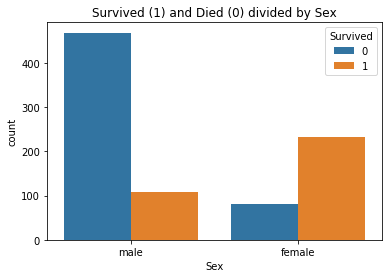

In [3]:
sns.countplot(data=training_data, x='Sex', hue='Survived').set_title('Survived (1) and Died (0) divided by Sex')

Text(0.5, 1.0, 'Survived (1) and Died (0) divided by Class')

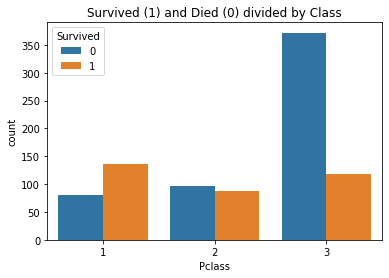

In [4]:
sns.countplot(data=training_data, x='Pclass', hue='Survived').set_title('Survived (1) and Died (0) divided by Class')

Text(0.5, 1.0, 'Survived (1) and Died (0) divided by Age')

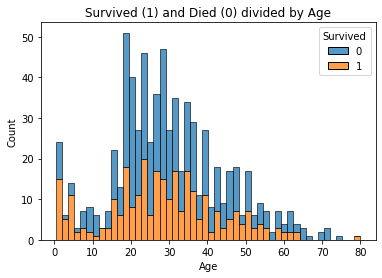

In [5]:
sns.histplot(data=training_data, x='Age', hue='Survived', multiple="stack",bins=50).set_title('Survived (1) and Died (0) divided by Age')

Text(0.5, 1.0, 'Survived (1) and Died (0) divided by number of siblings\nand/or spouse the person travelled with')

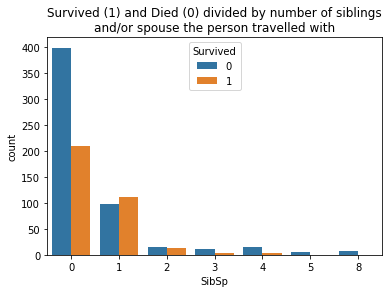

In [6]:
sns.countplot(data=training_data, x='SibSp',hue='Survived').set_title('Survived (1) and Died (0) divided by number of siblings\nand/or spouse the person travelled with')

Text(0.5, 1.0, 'Survived (1) and Died (0) divided by number of childs\nand/or parents the person travelled with')

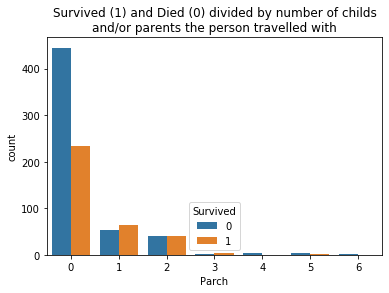

In [7]:
sns.countplot(data=training_data, x='Parch',hue='Survived').set_title('Survived (1) and Died (0) divided by number of childs\nand/or parents the person travelled with')

Text(0.5, 1.0, 'Survived (1) and Died (0) divided by Embarkment')

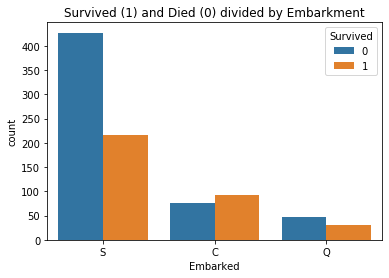

In [8]:
sns.countplot(data=training_data, x='Embarked',hue='Survived').set_title('Survived (1) and Died (0) divided by Embarkment')

Text(0.5, 1.0, 'Survived (1) and Died (0) divided by Fare')

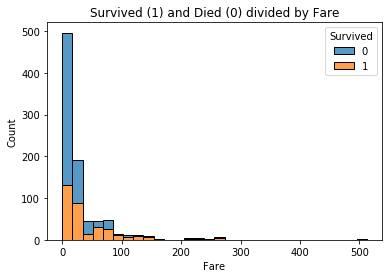

In [9]:
sns.histplot(data=training_data, x='Fare', hue='Survived', bins=30, multiple='stack').set_title('Survived (1) and Died (0) divided by Fare')

# Processing the data to prepare it for machine learning using the self programmed function process_train

In [10]:
processed_training_data = process_data(training_data)
processed_training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


# Spliting the data in to a matrix with the features and a vector with the response (Survived)

In [11]:
features = processed_training_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,0
2,1,0,38.0,1,0,71.2833,1
3,3,0,26.0,0,0,7.9250,0
4,1,0,35.0,1,0,53.1000,0
5,3,1,35.0,0,0,8.0500,0


In [12]:
response = processed_training_data['Survived']
response.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

# Spliting the data into knwon training data into two, so that machine learning models can be tested

In [13]:
features_train, features_test, response_train, response_test = train_test_split(features, response, random_state=1, test_size=0.3)
print(features_train.shape)
print(response_train.shape)
print(features_test.shape)
print(response_test.shape)

(623, 7)
(623,)
(268, 7)
(268,)


# First model: k-nearest-neighbors

Text(0, 0.5, 'Accuracy')

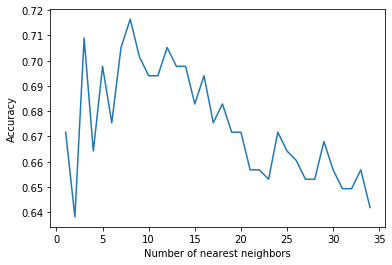

In [14]:
# test models for different amounts of nearest neigbors
k_range = list(range(1, 35))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, response_train)
    response_pred = knn.predict(features_test)
    scores.append(metrics.accuracy_score(response_test, response_pred))
plt.plot(k_range, scores)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy')

# Second model: Logistic regression

In [15]:
logreg = LogisticRegression()
logreg.fit(features_train, response_train)
response_pred = logreg.predict(features_test)
print(metrics.accuracy_score(response_test, response_pred))

0.7798507462686567


C:\Users\phili\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Loading the testing data from the titanic competition

In [16]:
test_data = pd.read_csv('test.csv', index_col=0)
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
processed_test_data = process_data(test_data)
processed_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,2
893,3,0,47.0,1,0,7.0000,0
894,2,1,62.0,0,0,9.6875,2
895,3,1,27.0,0,0,8.6625,0
896,3,0,22.0,1,1,12.2875,0


In [18]:
processed_test_data.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1305,3,1,30.27259,0,0,8.0500,0
1306,1,0,39.00000,0,0,108.9000,1
1307,3,1,38.50000,0,0,7.2500,0
1308,3,1,30.27259,0,0,8.0500,0
1309,3,1,30.27259,1,1,22.3583,1


# Making predictions with knn and k=9

In [19]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(features, response)
response_pred = knn.predict(processed_test_data)
print(response_pred)

[0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [20]:
results_knn_9 = prepare_submission(response_pred)

In [21]:
results_knn_9.to_csv('results_knn_9.csv',sep=',',index=False)

# Making predictions with log regression

In [22]:
logreg = LogisticRegression()
logreg.fit(features, response)
response_pred = logreg.predict(processed_test_data)
print(response_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


C:\Users\phili\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
results_logreg = prepare_submission(response_pred)
results_logreg.to_csv('results_logreg.csv',sep=',',index=False)